# **Project Introduction**

Our project will do an in-depth analysis of Chicago traffic data, that will provide drivers with relevant information to keep them safe on the road. We will explore how factors such as weather, visibility, driver alertness, time, and vehicles affect traffic crashes.

# **Changes since the proposal**

For our proposal, we decided to focus on three major American cities: Chicago, Los Angeles, and New York. We decided to change the scope to focus on Chicago data only, because the data that was in the other cities was not consistent, and they were not as in-depth as the Chicago dataset was. The Chicago data portal offers three very detailed data sets that will provide a better analysis than our previously proposed scope. Changing our scope to focusing on Chicago data will allow us to focus our efforts on analyzing the data instead of spending lots of time cleaning the three separate cities’ data sets and trying to pull common relevant information from each.

# **Data**

### Explanation of each data set:

**Traffic Crashes - Crashes:**
> “Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of the Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data )

We plan on using this data set to provide analysis on crash information such as lighting and road conditions, posted speed limits, contributing causes of the crash, as well as specific coordinates of the incident. This will provide us with the means to create heat maps of various traffic accidents by locations and an analysis of damages. Utilizing the Chicago data portal will also allow a wider analysis of the following Traffic Crash data sets via a crash_record_id column that is present in all three data sets. 

**Traffic Crashes - Vehicles:** 
> “This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset will be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units.” ( description provided by:  https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data )

The Vehicles data set will provide us information on the make and model of the car, as well as information about the vehicle at the time of the crash. This includes direction of travel, any known defects, where contact was made with the vehicle, as well as any maneuver the driver may have executed. This data set also includes information regarding whether the parties of the incident were pedestrians, bicyclists, or drivers. 

**Traffic Crashes - People:**
> “This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been occupants in a motor vehicle, but may have been a pedestrians, bicyclists, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer.” ( description provided by: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data )

The People data set tracks several metrics such as the class of driver’s license possessed, whether a safety belt was used, or whether airbags were deployed. This data set will be instrumental in our analysis of the human factor of these crashes, as well as quantifying impact and safety of driving practices. We will also be able to use the crash_record_id to perform any analysis of crash records based on age or sex, which will also be important for our hypotheses and exploratory analysis.

### Cleaning the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crashes_df = pd.read_csv('../data/chicago.csv')

# **Exploratory data analysis**

### Histogram of the number of units involved in a crash

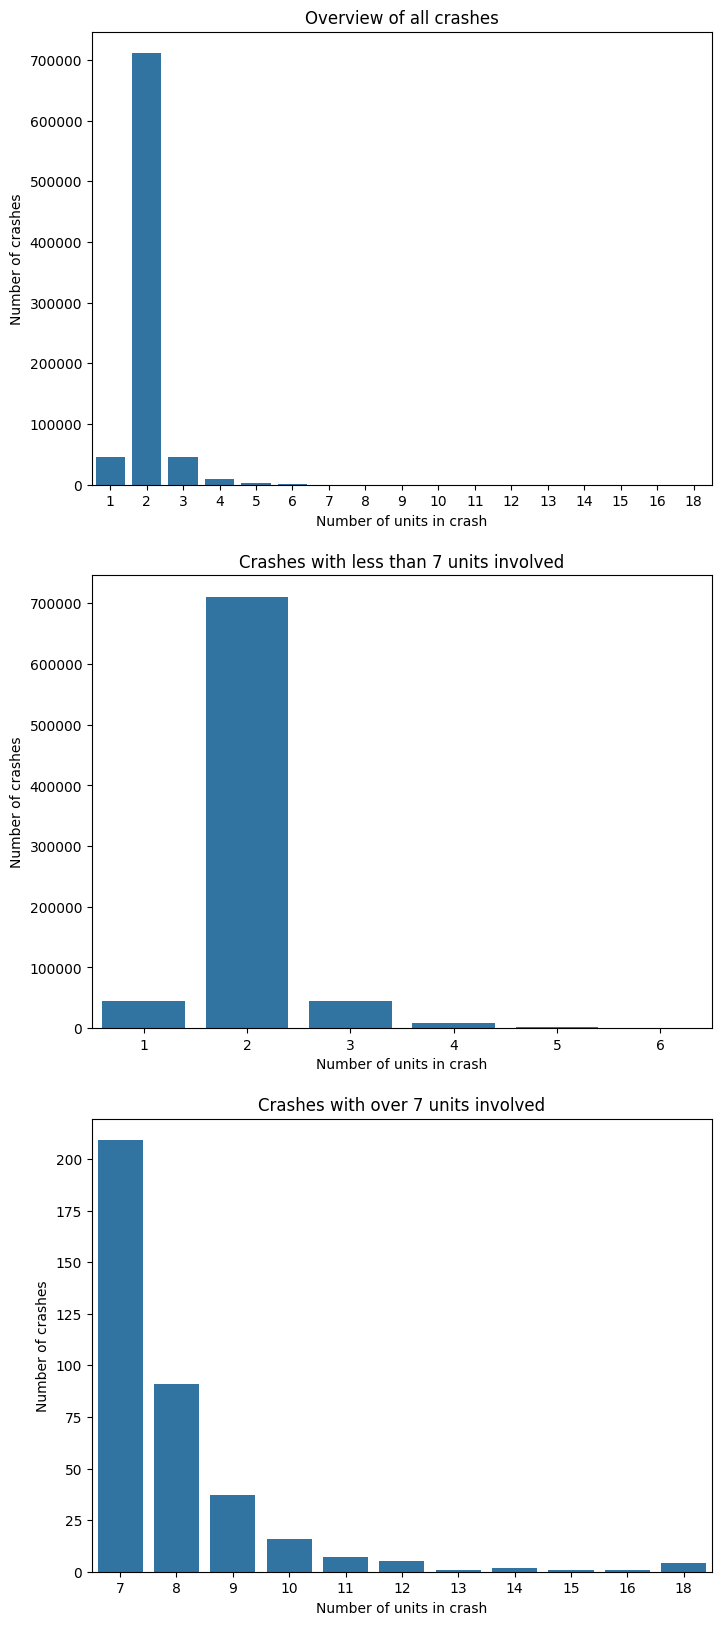

In [2]:
num_units_count = crashes_df.groupby('NUM_UNITS')['NUM_UNITS'].count()

split_counts = lambda b : crashes_df[b].groupby('NUM_UNITS')['NUM_UNITS'].count()
num_units_below_t = split_counts(crashes_df['NUM_UNITS'] < 7)
num_units_above_t = split_counts(crashes_df['NUM_UNITS'] >= 7)

figure, ax = plt.subplots(3, 1, figsize=(8,20))

plot_1 = sns.barplot(num_units_count, ax=ax[0])
plot_2 = sns.barplot(num_units_below_t, ax=ax[1])
plot_3 = sns.barplot(num_units_above_t, ax=ax[2])

def set_plot_styles(plot, title):
    plot.set_title(title)
    plot.set_ylabel('Number of crashes')
    plot.set_xlabel('Number of units in crash')

set_plot_styles(plot_1, 'Overview of all crashes')
set_plot_styles(plot_2, 'Crashes with less than 7 units involved')
set_plot_styles(plot_3, 'Crashes with over 7 units involved')
plt.show()

### Bar plot of weather conditions in crashes

WEATHER_CONDITION
BLOWING SAND, SOIL, DIRT         7
BLOWING SNOW                   440
CLEAR                       637179
CLOUDY/OVERCAST              24075
FOG/SMOKE/HAZE                1336
FREEZING RAIN/DRIZZLE         1690
OTHER                         2590
RAIN                         70926
SEVERE CROSS WIND GATE         153
SLEET/HAIL                    1001
SNOW                         28228
UNKNOWN                      44738
Name: WEATHER_CONDITION, dtype: int64


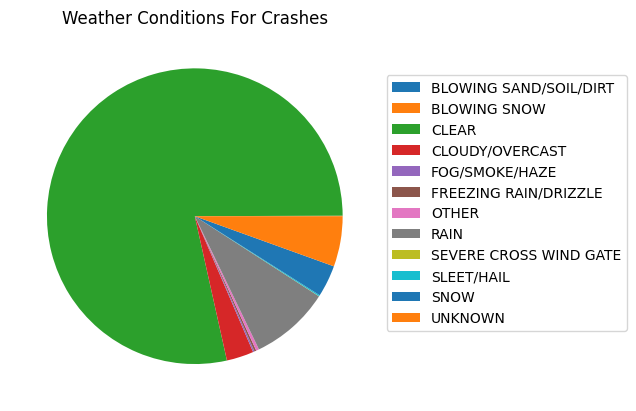

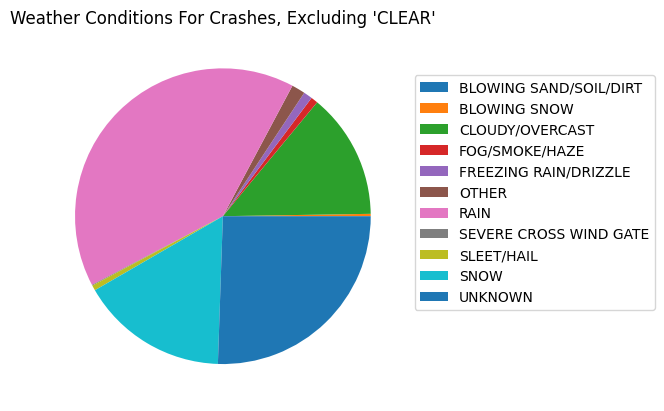

In [61]:
weather_condition_counts = crashes_df.groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
weather_excluding_clear = crashes_df[crashes_df['WEATHER_CONDITION'] != 'CLEAR'].groupby('WEATHER_CONDITION')['WEATHER_CONDITION'].count()
keys = [
    'BLOWING SAND/SOIL/DIRT',
    'BLOWING SNOW',
    'CLEAR',
    'CLOUDY/OVERCAST',
    'FOG/SMOKE/HAZE',
    'FREEZING RAIN/DRIZZLE',
    'OTHER',
    'RAIN',
    'SEVERE CROSS WIND GATE',
    'SLEET/HAIL',
    'SNOW',
    'UNKNOWN',
]


plt.figure(0)
plt.pie(weather_condition_counts, labels=None)
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes')

plt.figure(1)
plt.pie(weather_excluding_clear, labels=None)
keys.remove("CLEAR")
plt.legend(keys, bbox_to_anchor=(1,0.9))
plt.title('Weather Conditions For Crashes, Excluding \'CLEAR\'')

plt.show()

### Amount of hit and run crashes compared to non hit and run crashes

### Histogram of ages involved in crashes

### Gender distribution of crashes

# **Visualization 1**

### Hypothesis 1:

# **Visualization 2**

### Hypothesis 2:

# **Visualization 3**

### Hypothesis 3:

# **Visualization 4**

### Hypothesis 4:

# **Visualization 5**

### Hypothesis 5:

# **Machine Learning analysis 1**

### Hypothesis 1:

# **Machine Learning analysis 2**

### Hypothesis 2:

# **Reflection**

(reflection)